#### Importing utitlities

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#### Loading data and exploring data

In [2]:
data = pd.read_csv("./_Johannesburg.csv")


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10243 non-null  object 
 1   bedrooms          8549 non-null   float64
 2   bathrooms         8610 non-null   float64
 3   Type of Property  10030 non-null  object 
 4   Erf Size          5722 non-null   object 
 5   Floor Size        5113 non-null   object 
 6   Levies            3430 non-null   object 
 7   Pool              10243 non-null  int64  
 8   Rates and Taxes   5284 non-null   object 
 9   parking space     6967 non-null   float64
 10  Pets Allowed      4483 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 880.4+ KB


None

In [4]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
bedrooms,8549.0,3.149433,3.968352,0.5,2.0,3.0,3.0,152.0
bathrooms,8610.0,2.164518,2.280858,0.5,1.0,2.0,2.5,80.0
Pool,10243.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
parking space,6967.0,2.681427,2.973883,1.0,1.0,2.0,3.0,122.0
Pets Allowed,4483.0,0.548294,0.497718,0.0,0.0,1.0,1.0,1.0


In [5]:
display(data.sample(10).T)

,3475,3004,6739,3978,9701,3785,271,427,1734,4815
price,R 2 750 000,R 999 000,R 950 000,R 3 950 000,R 549 000,R 2 000 000,R 4 200 000,R 675 000,R 365 000,R 950 000
bedrooms,3.0,4.0,3.0,4.0,1.0,7.0,4.0,2.0,2.0,2.0
bathrooms,3.0,3.0,3.0,2.5,1.0,2.0,2.5,1.0,1.0,1.0
Type of Property,House,House,House,Townhouse,Apartment/Flat,House,House,Apartment/Flat,Apartment/Flat,Apartment/Flat
Erf Size,500m²,600m²,911m²,685m²,NaN,NaN,504m²,NaN,1243m²,NaN
Floor Size,NaN,NaN,NaN,NaN,82m²,NaN,286m²,51m²,107m²,74m²
Levies,NaN,NaN,NaN,R3300,NaN,NaN,R3890,R1100,NaN,NaN
Pool,0,0,0,0,0,0,0,0,0,0
Rates and Taxes,NaN,R278,NaN,R3000,NaN,NaN,R2794,R150,NaN,NaN
parking space,6.0,4.0,2.0,4.0,NaN,5.0,2.0,1.0,1.0,NaN


#### Pre-processing data and cleaning

##### NaN heatmap

<AxesSubplot:>

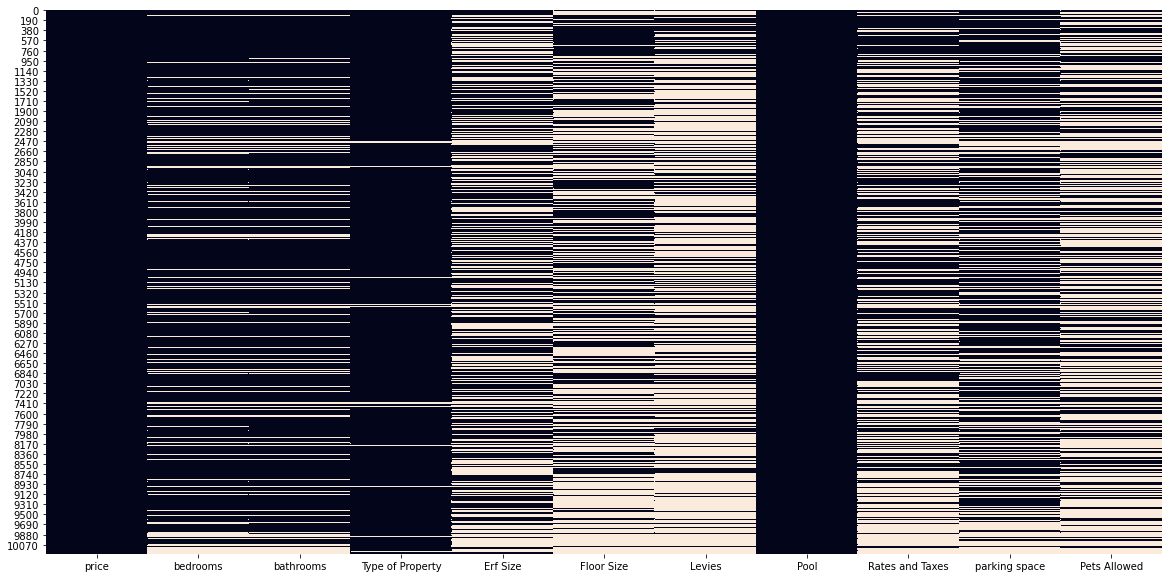

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

##### formating data special characters

In [7]:

data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')

data['erf_size'] = data['erf_size'].str.replace('m²', '')
data['erf_size'] = data['erf_size'].str.replace(' ', '')
data['erf_size'].loc[data['erf_size'].str.contains('ha', na=False)]
data['erf_size'] = data['erf_size'].str.replace('ha', '0000')
data['erf_size'] = pd.to_numeric(data['erf_size'], errors='coerce')

data['floor_size'] = data['floor_size'].str.replace('m²', '')
data['floor_size'] = data['floor_size'].str.replace(' ', '')
data['floor_size'] = pd.to_numeric(data['floor_size'], errors='coerce')

data['price'] = data['price'].str.replace('R', '')
data['price'] = data['price'].str.replace(' ', '')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data['levies'] = data['levies'].str.replace(' ', '')
data['levies'] = data['levies'].str.replace('R', '')
data['levies'] = pd.to_numeric(data['levies'], errors='coerce')

data['rates_and_taxes'] = data['rates_and_taxes'].str.replace('R', '')
data['rates_and_taxes'] = data['rates_and_taxes'].str.replace(' ', '')
data['rates_and_taxes'] = pd.to_numeric(data['rates_and_taxes'], errors='coerce')

### Visualizing correlations

#### Correlation between features and label

<AxesSubplot:>

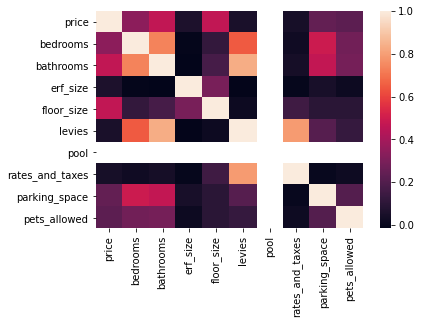

In [8]:
sns.heatmap(data.corr())

In [9]:
data.corr()['price'].sort_values(ascending=False)

price              1.000000
floor_size         0.466185
bathrooms          0.464472
bedrooms           0.343688
parking_space      0.244216
pets_allowed       0.225884
erf_size           0.060782
levies             0.052965
rates_and_taxes    0.045452
pool                    NaN
Name: price, dtype: float64

#### Correlation between features


In [10]:
data.corr()['bathrooms'].sort_values(ascending=False)
data.corr()['levies'].sort_values(ascending=False)
data.corr()['rates_and_taxes'].sort_values(ascending=False)

rates_and_taxes    1.000000
levies             0.791657
floor_size         0.152614
price              0.045452
bathrooms          0.039167
bedrooms           0.025549
pets_allowed       0.020368
parking_space      0.007024
erf_size          -0.001180
pool                    NaN
Name: rates_and_taxes, dtype: float64

### Visualizing outliers


<AxesSubplot:xlabel='price'>

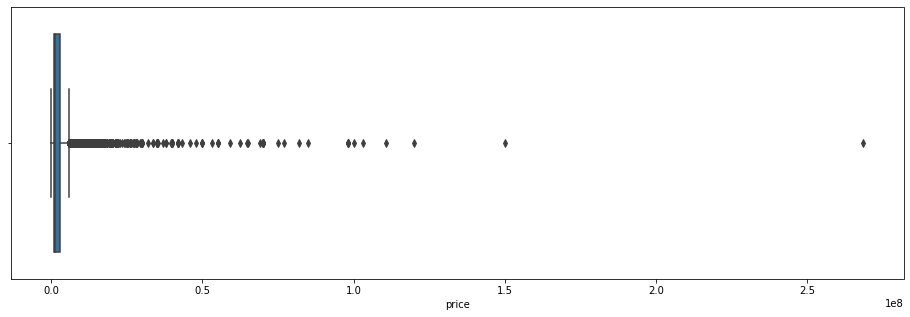

In [11]:
plt.figure(figsize=(16,5))
sns.boxplot(x=data['price'])

## Pre-processing

##### Pie Chart of type of property

<AxesSubplot:ylabel='type_of_property'>

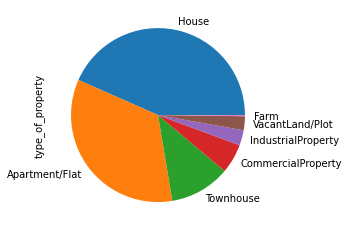

In [12]:
data['type_of_property'].value_counts().plot.pie()

#### Droping preperty of type of Farm, Industrie, commercial, vancantLand


In [13]:
data = data.drop(data.loc[data['type_of_property'] == 'CommercialProperty'].index)
data = data.drop(data.loc[data['type_of_property'] == 'Farm'].index)
data = data.drop(data.loc[data['type_of_property'] == 'VacantLand/Plot'].index)
data = data.drop(data.loc[data['type_of_property'] == 'IndustrialProperty'].index)

##### After drop

<AxesSubplot:ylabel='type_of_property'>

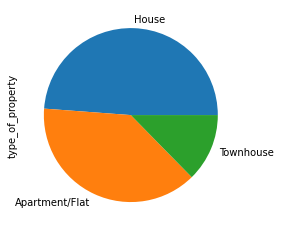

In [14]:
data['type_of_property'].value_counts().plot.pie()

##### Droping useless Levies feature because there is so many NaN

In [15]:

data = data.drop('levies', axis=1)

##### Removing outlier

In [16]:
upper_price_limit = data['price'].quantile(0.99999999)
lower_price_limit = data['price'].quantile(0.01)
data = data[(data['price'] <= upper_price_limit) & (data['price'] >= lower_price_limit)]


##### Droping NaN in type_of_property


In [17]:
data = data.drop(data.loc[data['type_of_property'].isna()].index)

##### Filling NaN value of rates and taxes of specific type of property

In [18]:
median_taxes_house = data.loc[data['type_of_property'] == 'House']['rates_and_taxes'].median()
median_taxes_appartment = data.loc[data['type_of_property'] == 'Apartment/Flat']['rates_and_taxes'].median()
median_taxes_townHouse = data.loc[data['type_of_property'] == 'Townhouse']['rates_and_taxes'].median()

data.loc[data['type_of_property'].eq('Apartment/Flat') & data['rates_and_taxes'].isna(), 'rates_and_taxes'] = median_taxes_appartment 
data.loc[data['type_of_property'].eq('Townhouse') & data['rates_and_taxes'].isna(), 'rates_and_taxes'] = median_taxes_townHouse 
data.loc[data['type_of_property'].eq('House') & data['rates_and_taxes'].isna(), 'rates_and_taxes'] = median_taxes_house 


##### Filling NaN of parkings, pets allowed

In [19]:
data.loc[data['parking_space'].isna(), 'parking_space'] = 0
data.loc[data['pets_allowed'].isna(), 'pets_allowed'] = 0

##### Transform bedrooms and bathrooms NaN to median

In [20]:
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['bedrooms'].isna(), 'bedrooms'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['bedrooms'].median()
data.loc[data['type_of_property'].eq('House') & data['bedrooms'].isna(), 'bedrooms'] = data.loc[data['type_of_property'] == 'House']['bedrooms'].median()
data.loc[data['type_of_property'].eq('Townhouse') & data['bedrooms'].isna(), 'bedrooms'] = data.loc[data['type_of_property'] == 'Townhouse']['bedrooms'].median()

median_bathrooms_house = data.loc[data['type_of_property'] == 'House']['bathrooms'].median()
median_bathrooms_appartment = data.loc[data['type_of_property'] == 'Apartment/Flat']['bathrooms'].median()
median_bathrooms_townhouse = data.loc[data['type_of_property'] == 'Townhouse']['bathrooms'].median()

data.loc[data['type_of_property'].eq('House') & data['bathrooms'].isna(), 'bathrooms'] = median_bathrooms_house
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['bathrooms'].isna(), 'bathrooms'] = median_bathrooms_appartment
data.loc[data['type_of_property'].eq('Townhouse') & data['bathrooms'].isna(), 'bathrooms'] = median_bathrooms_townhouse

##### Transform erf size and floor size NaN to median

In [21]:
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['erf_size'].isna(), 'erf_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['floor_size']
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['erf_size'].isna() & data['floor_size'].isna() , 'erf_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['erf_size'].median()
data.loc[data['type_of_property'].eq('House') & data['erf_size'].isna(), 'erf_size'] = data.loc[data['type_of_property'] == 'House']['erf_size'].median()
data.loc[data['type_of_property'].eq('Townhouse') & data['erf_size'].isna(), 'erf_size'] = data.loc[data['type_of_property'] == 'Townhouse']['erf_size'].median()
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['floor_size'].isna(), 'floor_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['erf_size']
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['floor_size'].isna() & data['erf_size'].isna() , 'floor_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['floor_size'].median()
data.loc[data['type_of_property'].eq('House') & data['floor_size'].isna(), 'floor_size'] = data.loc[data['type_of_property'] == 'House']['floor_size'].median()
data.loc[data['type_of_property'].eq('Townhouse') & data['floor_size'].isna(), 'floor_size'] = data.loc[data['type_of_property'] == 'Townhouse']['floor_size'].median()


##### Encoding

In [22]:
data["type_of_property"] = data["type_of_property"].replace(["Apartment/Flat", "House", "Townhouse"], [0,1,2])

##### Function for Finding best model parameters

In [23]:
def testModel(model , cv ,x , y , params):
    grid = GridSearchCV(estimator=model , param_grid=params , cv = cv )
    grid.fit(x , y)
    return grid.best_params_


##### Setting X and y

In [24]:
X = data.drop(["price"], axis=1)
y = data["price"]

##### Normalization

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

#### Splitting data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Testing model

##### Random Forest Regressor

In [26]:
randomForst_model = RandomForestRegressor()
cv = 5
params = {'n_estimators': [200 , 300 , 400, 500 , 600],
            'max_features':[0.1 , 0.3 , 0.6]
        }

testModel(randomForst_model , cv ,X_train , y_train, params)

{'max_features': 0.3, 'n_estimators': 300}

In [27]:
randomForst_model = RandomForestRegressor(n_estimators=400 , max_features = 0.3)
randomForst_model.fit(X_train, y_train)
randomForest_score = randomForst_model.score(X_test, y_test)
randomForest_score

0.3737832666575204

##### Linear Regression

In [28]:
Linear_model = LinearRegression()
cv = 5
params = {'fit_intercept': [True , False],
          'n_jobs':[1,2,3]
        }

testModel(Linear_model , cv ,X_train , y_train, params)

{'fit_intercept': True, 'n_jobs': 1}

In [29]:
Linear_model = LinearRegression(fit_intercept=True , n_jobs=1)
Linear_model.fit(X_train , y_train)
LinearRegression_score = Linear_model.score(X_test , y_test)
LinearRegression_score

0.17069186051010798

Gradient Boosting Regressor

In [30]:
GradientBoost_model = GradientBoostingRegressor()
cv = 5
params = {'n_estimators': [200 , 300 , 400, 500 , 600]
        }

testModel(GradientBoost_model , cv ,X_train , y_train, params)

{'n_estimators': 400}

In [31]:
GradientBoost_model = GradientBoostingRegressor(n_estimators=200)
GradientBoost_model.fit(X_train , y_train)
GradientBooster_score = GradientBoost_model.score(X_test , y_test)
GradientBooster_score

0.3026457089560243

##### Choosing Best Model

In [32]:
def chooseModel(LinearRegression_score , GradientBooster_score , randomForest_score):
    if (LinearRegression_score <= GradientBooster_score):
        if (GradientBooster_score <= randomForest_score):
            model = randomForst_model
        else:
            model = GradientBoost_model
    else:
        if (LinearRegression_score <= randomForest_score):
            model = randomForst_model
        else:
            model = Linear_model
    return model

In [33]:
model = chooseModel(LinearRegression_score , GradientBooster_score , randomForest_score)
model

RandomForestRegressor(max_features=0.3, n_estimators=400)

##### Pipeline

In [34]:
transformer_features = ['bedrooms', 'bathrooms' ,'type_of_property','erf_size','floor_size','rates_and_taxes', 'parking_space','pets_allowed']
transformer_pipeline = make_pipeline(MinMaxScaler())
preprocessor = make_column_transformer((transformer_pipeline,transformer_features))
model = make_pipeline(preprocessor, 
                     GradientBoostingRegressor(n_estimators=200)
                     )
model.fit(X_train , y_train)
model.score(X_test , y_test) 

0.33342753972765127

#### Creating model

In [35]:
with open("./model/johannesburg_model.pkl","wb") as file:
    pickle.dump(model, file)

FileNotFoundError: [Errno 2] No such file or directory: './model/johannesburg_model.pkl'